In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import os

In [10]:
# Importing data

df = pd.read_csv('data\measurements.csv')
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


## Exploratory data analysis

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# from sklearn.linear_model import LinearRegression

import os

In [9]:
df.shape

(388, 12)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB
None


In [12]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.0000,388.0000,388.0000,388.0000,388.0000
mean,41.9278,11.3582,0.0773,0.1237,0.0825
std,13.5985,6.9915,0.2674,0.3297,0.2754
min,14.0000,-5.0000,0.0000,0.0000,0.0000
25%,32.7500,7.0000,0.0000,0.0000,0.0000
50%,40.5000,10.0000,0.0000,0.0000,0.0000
75%,50.0000,16.0000,0.0000,0.0000,0.0000
max,90.0000,31.0000,1.0000,1.0000,1.0000


In [13]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

## Cleaning the data

In [16]:
# Converting the ',' in '.' to be able to transform it to float
df["distance"]=df["distance"].str.replace(',', '.')
df["consume"]=df["consume"].str.replace(',', '.')
df["temp_inside"]=df["temp_inside"].str.replace(',', '.')
df["refill liters"]=df["refill liters"].str.replace(',', '.')

# Coverting some featuares to float
df["distance"]=df["distance"].astype(np.float)
df["consume"]=df["consume"].astype(np.float)
df["temp_inside"]=df["temp_inside"].astype(np.float)
df["refill liters"]=df["refill liters"].astype(np.float)

#Dealing with Nans
df["temp_inside"]=df["temp_inside"].fillna(np.mean(df["temp_inside"]))



print(df.dtypes)
print(df.isnull().sum())
df.head(10)

distance         float64
consume          float64
speed              int64
temp_inside      float64
temp_outside       int64
specials          object
gas_type          object
AC                 int64
rain               int64
sun                int64
refill liters    float64
refill gas        object
dtype: object
distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0000,5.0000,26,21.5000,12,NaN,E10,0,0,0,45.0000,E10
1,12.0000,4.2000,30,21.5000,13,NaN,E10,0,0,0,NaN,NaN
2,11.2000,5.5000,38,21.5000,15,NaN,E10,0,0,0,NaN,NaN
3,12.9000,3.9000,36,21.5000,14,NaN,E10,0,0,0,NaN,NaN
4,18.5000,4.5000,46,21.5000,15,NaN,E10,0,0,0,NaN,NaN
5,8.3000,6.4000,50,21.5000,10,NaN,E10,0,0,0,NaN,NaN
6,7.8000,4.4000,43,21.5000,11,NaN,E10,0,0,0,NaN,NaN
7,12.3000,5.0000,40,21.5000,6,NaN,E10,0,0,0,NaN,NaN
8,4.9000,6.4000,26,21.5000,4,NaN,E10,0,0,0,NaN,NaN
9,11.9000,5.3000,30,21.5000,9,NaN,E10,0,0,0,NaN,NaN


### Visualizations

Text(0.5, 1.0, 'gas_type')

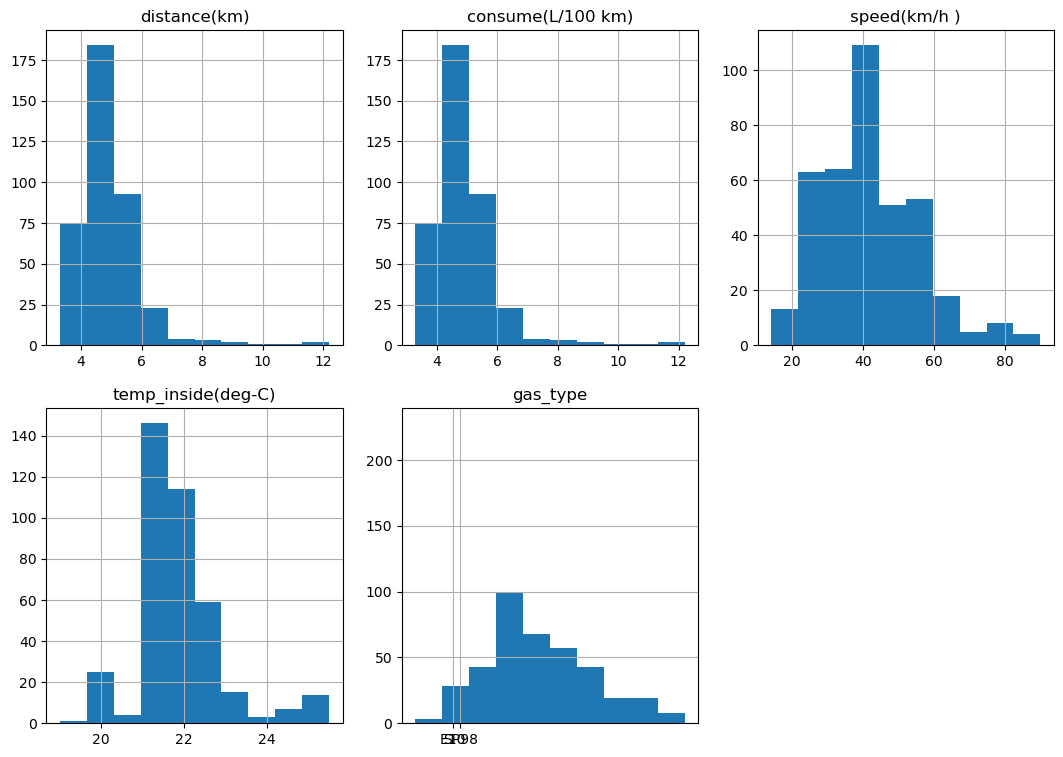

In [35]:
# Columns distribution.

plt.figure(figsize=(13,9))
ax1=plt.subplot(2,3,1)
df.consume.hist(bins=10,ax=ax1)
plt.title("distance(km)")

ax2=plt.subplot(2,3,2)
df.consume.hist(bins=10,ax=ax2)
plt.title("consume(L/100 km)")

ax3=plt.subplot(2,3,3)
df.speed.hist(bins=10,ax=ax3)
plt.title("speed(km/h )")

ax4=plt.subplot(2,3,4)
df.temp_inside.hist(bins=10,ax=ax4)
plt.title("temp_inside(deg-C)")

ax5=plt.subplot(2,3,5)
df.temp_outside.hist(bins=10,ax=ax5)
plt.title("temp_outside(deg-C)")

ax6=plt.subplot(2,3,5)
df.gas_type.hist(bins=10,ax=ax5)
plt.title("gas_type")

gas_type     E10    SP98
mean      4.9313  4.8991
median    4.8000  4.7000
amin      3.7000  3.3000
amax     10.8000 12.2000


Text(0.5, 1.0, 'gas_type & consume')

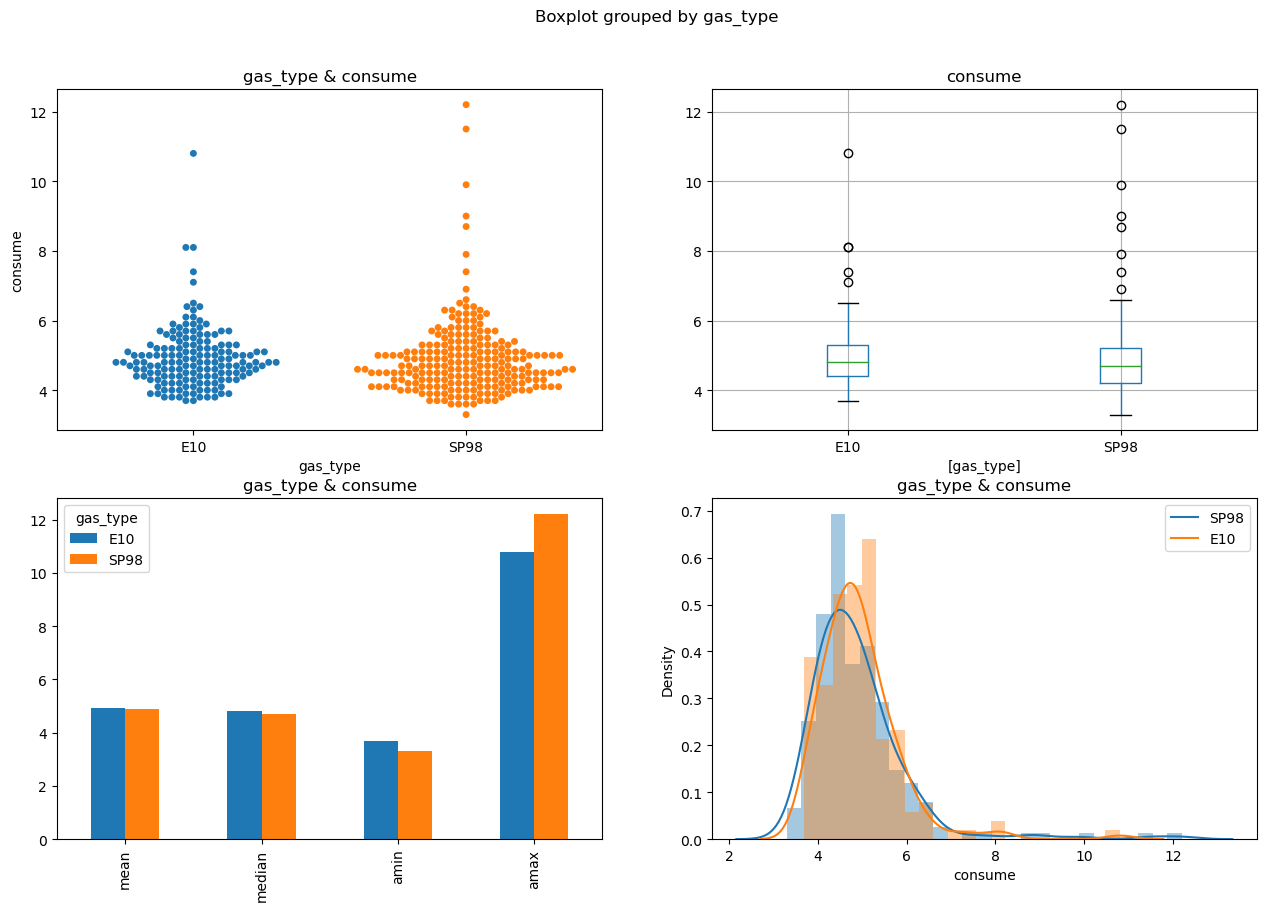

In [21]:
# Compare between GAS TYPE & CONSUME

plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.swarmplot(x=df['gas_type'],
              y=df['consume'],ax=ax1)
plt.title("gas_type & consume")

ax2=plt.subplot(2,2,2)
t=df[["consume","gas_type"]]
k2=t.boxplot(by="gas_type",ax=ax2)                                      

ax3=plt.subplot(2,2,3)
c=df.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax3)
plt.title("gas_type & consume")

ax4=plt.subplot(2,2,4)
# t[t.gas_type=="SP98"].plot.kde(ax=ax4)
# t[t.gas_type=="E10"].plot.kde(ax=ax4)
sns.distplot(t[t.gas_type=="SP98"]["consume"],ax=ax4)
sns.distplot(t[t.gas_type=="E10"]["consume"],ax=ax4)
plt.legend(["SP98","E10"])
plt.title("gas_type & consume")

AC           0       1
mean    4.8835  5.2567
median  4.7000  4.9000
amin    3.3000  4.0000
amax   11.5000 12.2000


Text(0.5, 1.0, 'AC & consume')

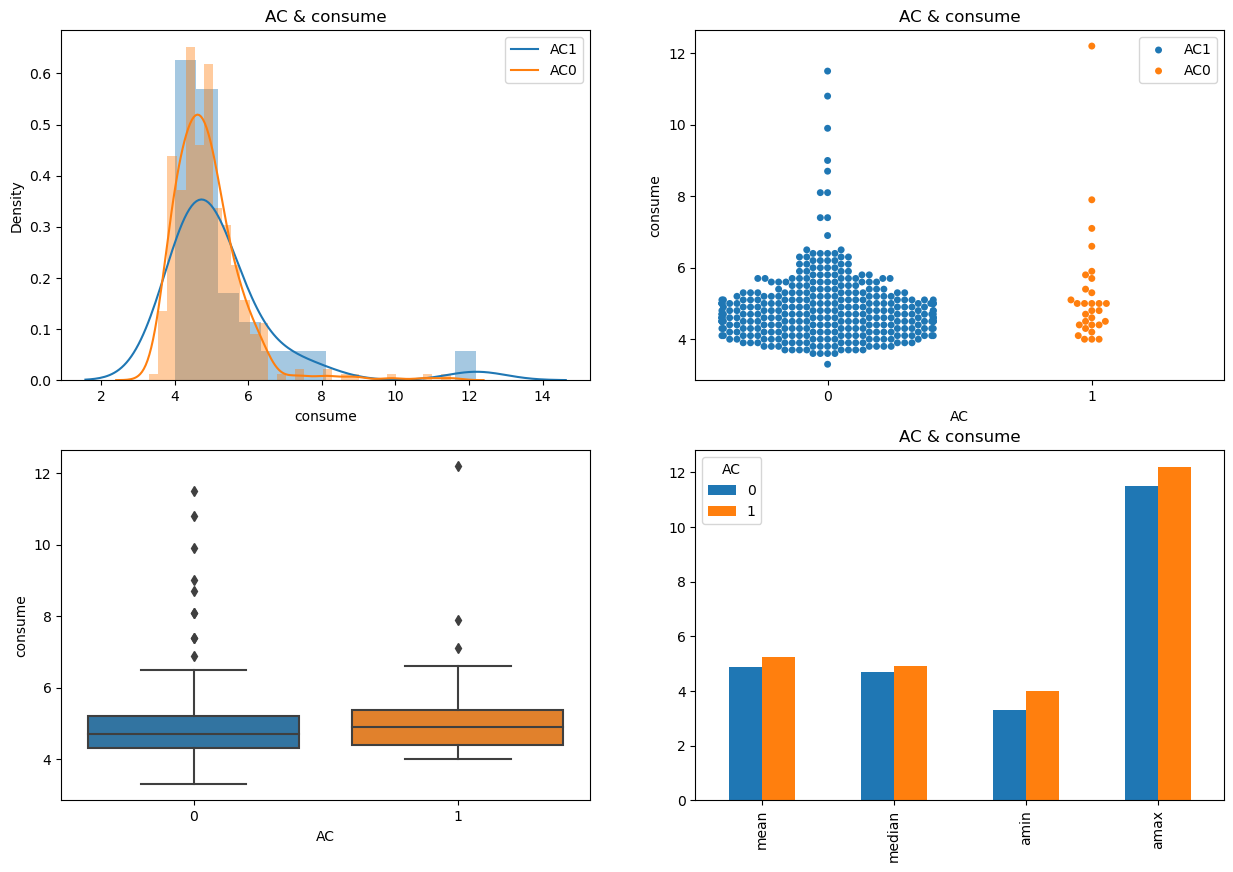

In [22]:
# Compare between AC & CONSUME.

plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.AC==1].consume,ax=ax1)
sns.distplot(df[df.AC==0].consume,ax=ax1)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df.AC,y=df.consume,ax=ax2)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=df.AC,y=df.consume,ax=ax3)

ax4=plt.subplot(2,2,4)
c=df.groupby("AC")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax4)
plt.title("AC & consume")

In [24]:
# Compare between RAIN & CONSUME

Text(0.5, 1.0, 'rain & consume')

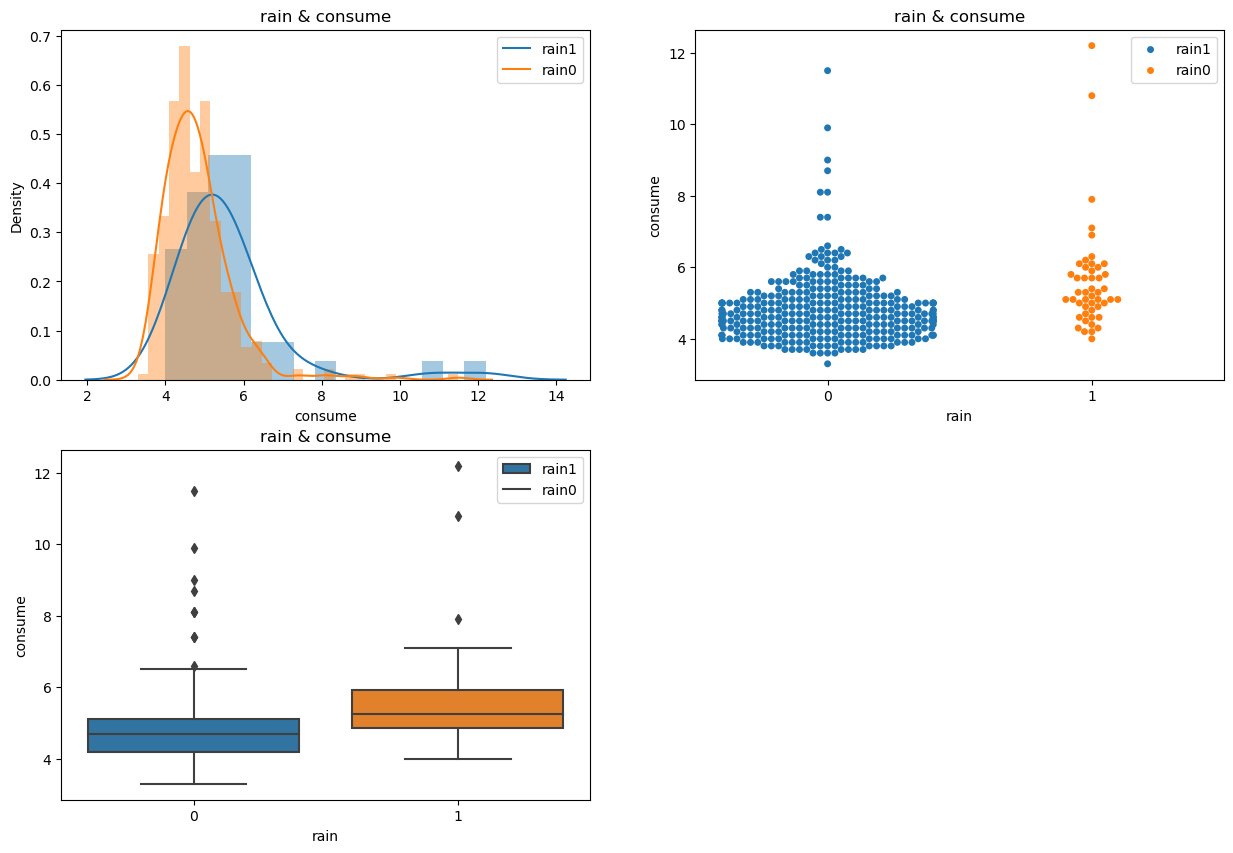

In [25]:
# rain
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.distplot(df[df.rain==1].consume,ax=ax1)
sns.distplot(df[df.rain==0].consume,ax=ax1)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df.rain,y=df.consume,ax=ax2)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=df.rain,y=df.consume,ax=ax3)
plt.legend(["rain1","rain0"])
plt.title("rain & consume")

In [44]:
df.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
distance,1.0000,-0.1290,0.5623,0.0752,0.0882,-0.0257,-0.0198,0.0811,0.1329
consume,-0.1290,1.0000,-0.2279,-0.1606,-0.3208,0.0966,0.2481,-0.1707,0.1009
speed,0.5623,-0.2279,1.0000,0.0593,0.0154,-0.0354,0.0095,0.0816,0.0497
temp_inside,0.0752,-0.1606,0.0593,1.0000,0.3595,0.2974,-0.0369,0.2422,0.0341
temp_outside,0.0882,-0.3208,0.0154,0.3595,1.0000,0.1676,-0.1863,0.3469,-0.0849
AC,-0.0257,0.0966,-0.0354,0.2974,0.1676,1.0000,0.2429,0.0886,NaN
rain,-0.0198,0.2481,0.0095,-0.0369,-0.1863,0.2429,1.0000,-0.1126,-0.4945
sun,0.0811,-0.1707,0.0816,0.2422,0.3469,0.0886,-0.1126,1.0000,NaN
refill liters,0.1329,0.1009,0.0497,0.0341,-0.0849,NaN,-0.4945,NaN,1.0000


## Preprocessing

#### I'm going to make a prediction of the 'rain' with using the consume 

In [47]:
## train/test split

X = df["consume"]
y = df['rain']

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.25, random_state=0)

In [48]:
preprocessor =StandardScaler()

X_train = preprocessor.fit_transform(X_train.to_frame())
## turns_train --> (turns_train - avg(turns_train))/ std(turns_train)

X_test = preprocessor.transform(X_test.to_frame())

In [58]:
# Train the model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions
pred_train = classifier.predict(X_train)
pred_test = classifier.predict(X_test)

### Accuracy/ F1 score

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
#Accuracy
print("accuracy on train set: ", accuracy_score(y_train, pred_train))
print("accuracy on test set: ", accuracy_score(y_test, pred_test))

accuracy on train set:  0.8625429553264605
accuracy on test set:  0.8865979381443299


# Conclusions

It's posible to predict if has rained using the amount of consume as a explanitive variable